In [1]:
import torch
import torch.nn as nn
from helchriss.utils import stprint

# Domain Definition
create function domains and evaluate using executor.

In [2]:
from domains.math.integer_domain import integer_executor
r_int = integer_executor.evaluate("plus(one(), two())", {})
stprint(r_int)

from domains.spatial.circle_domain import circle_executor
r_circ = circle_executor.evaluate("area(unit_circle())", {})
stprint(r_circ)

14 11:27:39 Function one automatically registered.
14 11:27:39 Function two automatically registered.
14 11:27:39 Function three automatically registered.
14 11:27:39 Function plus automatically registered.
14 11:27:39 Function smaller automatically registered.
14 11:27:39 Function bigger automatically registered.
14 11:27:39 Function N automatically registered.
14 11:27:39 Function Z automatically registered.
14 11:27:39 Function subset automatically registered.
14 11:27:39 Function unit_circle automatically registered.
14 11:27:39 Function area automatically registered.
14 11:27:39 Function disconnected automatically registered.
14 11:27:39 Function externally_connected automatically registered.
14 11:27:39 Function partial_overlap automatically registered.
14 11:27:39 Function equal automatically registered.
14 11:27:39 Function tangential_proper_part automatically registered.
14 11:27:39 Function non_tangential_proper_part automatically registered.
14 11:27:39 Function tangential_p

r_int = Value:[3.0]-int P:[1.0] (Value)
r_circ = Value:[tensor([3.1416])]-region P:[1.0] (Value)


# Rewrite Rules
   1. a `LocalFrame` module is several rewrite rules that shares the same arg writer.
   2. a NeuralRewriter module compose of a dictionary of LocalFrame.

In [3]:
from core.metaphors.rewrite import NeuralRewriter, LocalFrame
rewriter = NeuralRewriter()
#frame = LocalFrame()
#rewriter.add_frame("rw", frame)

# Rewrite Executor
**Property**
1) it stores a `ExecutorGroup` that can look up domain functions.
2) a rewriter of class `NeuralRewriter`, is stores all the rewrite rules learned.

**Methods**
1) `evaluate(expr, grounding)` method takes a expression and grounding as input, then calculate the exepected output of an expression over all rewrite rules. The output should be a single value as the exepected output.
2) `infer_rewrite` method takes an expression (and grounding) as input and propose several rewrite rules

In [4]:
from core.metaphors.executor import ExecutorGroup, RewriteExecutor
from helchriss.knowledge.symbolic import Expression
executor = RewriteExecutor(ExecutorGroup([circle_executor, integer_executor]))
result = executor.evaluate("plus:Integer(one:Integer(), two:Integer())", {})
print(result)

from helchriss.dsl.dsl_types import AnyType
executor.base_executor.register_function("idd", [AnyType],AnyType, nn.Identity())

expr = "partial_overlap:Circle(N:Integer(), unit_circle:Circle())"
expr = Expression.parse_program_string(expr)
hypothesis = executor.infer_rewrite_expr(expr)
stprint(hypothesis)
executor.add_metaphors(hypothesis) ### add rewrite exprs


executor.evaluate(expr, grounding = {})


14 11:27:39 WRN The input domain is empty, creating an empty domain
14 11:27:39 WRN The input domain is empty, creating an empty domain


Value:[3.0]-int P:[1.0]
hypothesis = list (length: 1)[
  list (length: 4)[
    0: 'partial_overlap:Circle'
    list (length: 2)[
      0: state (TypeBase)
      1: state (TypeBase)
    ]
    list (length: 2)[
      0: set (TypeBase)
      1: state (TypeBase)
    ]
    3: boolean (TypeBase)
  ]
]


Value:[tensor([-0.2567], grad_fn=<AddBackward0>)]-boolean P:[1.0]

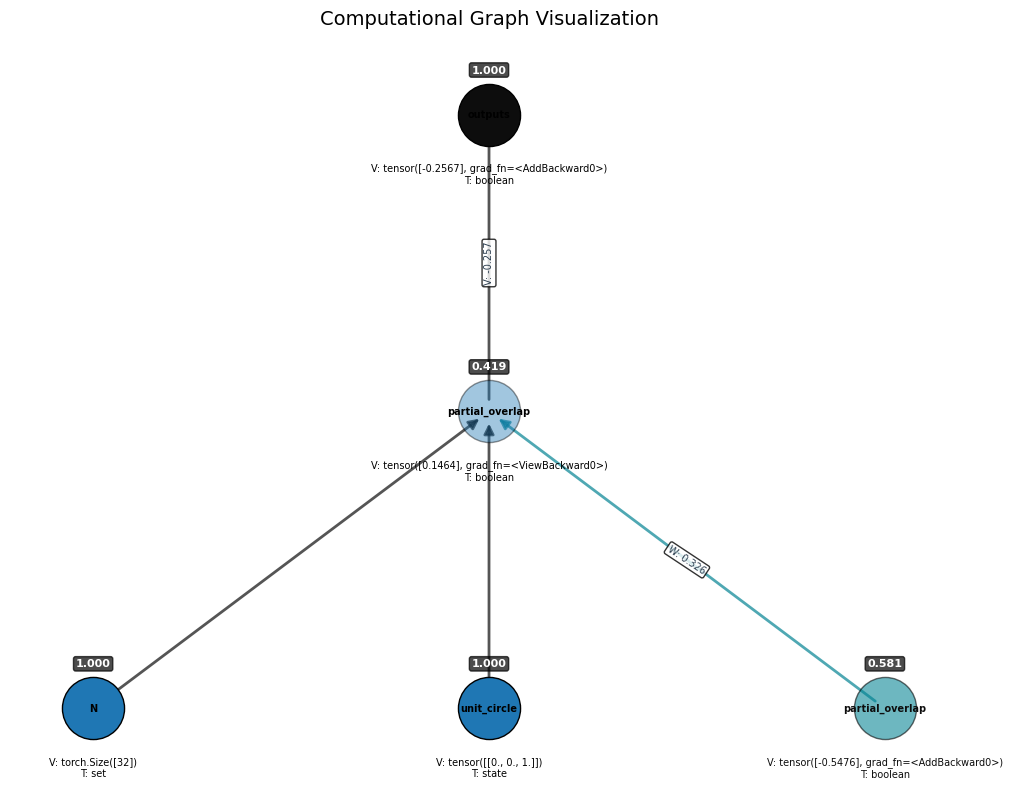

before training
where are done here.


In [5]:

expr = "partial_overlap:Circle(N:Integer(), unit_circle:Circle())"
expr = Expression.parse_program_string(expr)

executor.base_executor.freeze_extended(False)
optim = torch.optim.Adam(executor.parameters(), lr = 1e-3)

executor.display("namo")
print("before training")

for epoch in range(100):
    result = executor.evaluate(expr, grounding = {})
    loss = torch.nn.functional.binary_cross_entropy_with_logits(torch.tensor([1.0]), result.value)
    optim.zero_grad()
    loss.backward()
    optim.step()

executor.evaluate(expr, grounding = {})


#executor.display("outputs/namo")
print("where are done here.")


In [6]:
from core.model import MetaLearner


learner = MetaLearner([circle_executor, integer_executor])


14 11:27:40 WRN The input domain is empty, creating an empty domain
14 11:27:40 WRN The input domain is empty, creating an empty domain


# Grounding Concepts
MetaLearner can learn to ground concepts using various sources.

In [7]:
### use the model to learn to grounding using vqa and descriptive sentence.

# Planning with Actions

In [8]:
### this can perform planning with various concepts.

# Solving CCSP Config
solve a ccsp configuration using the `make ...` descripption. Also allowed to training etc.

# Continual Learning Concepts
MetaLearner can continually learning new concepts using only language description of the new word and the related domain entries.